## COMP5721M: Programming for Data Science 

## Group project (Coursework 2): Data Analysis Project


# Analysing mental health in the tech industry


_Give names and emails of group members here:_

* Stephen McGuinness, zmmh2430@leeds.ac.uk
* Yuchen Sun, xvws5109@leeds.ac.uk
* Xiao Tan, rdjl5698@leeds.ac.uk
* Yuanlin Zhou, psvh7735@leeds.ac.uk

# Project Requirements
_PLEASE DELETE THIS WHOLE CELL BEFORE SUBMITTING YOUR PROJECT_

The purpose of this assignment is to develop your skills
in organising and presenting a data analysis project.

Since most of the marks will be awarded for organisation
and presentation, it is suggested that you do not initially attempt
anything too complicated. However, once you have managed
to get a basic pipeline working that fits the guidelines, 
you are encouraged to extend and elaborate your analysis.

Your project should entirely be contained within this template file.
You should keep the basic structure indicated below. To facilitate
grading according to the marking scheme.

You _may_ import any module that is provided with Anaconda3 Python.


### Marking Scheme

The marking scheme  is as follows:

* Project Plan:
    * Description of data to be used (10)
    * Overview of Project Aims  (5)
    * Design  (5)
    
* Program Code: (15)<br>
    Code should be laid out in steps with explanations
    and intermediate output with comments. 
    You should ensure that the steps do not require
    a large amount of processing time.

* Project Outcome:
    * Explanation of Results (10)<br>
        This should include a qualitative description
        of the results as well as key figures and tables
        of results.
    * Results visualisation (10)<br>
        This should be graphical representations of the
        results with brief explanations (ordinary tables will be
        graded as part of the explanation of results)
    * Conclusion (5)

### Data Resources

You can use any data you like. Many useful resources are available.

The Data Resources section of the module (Unit 4.3 on Minerva) has links to several example data sets.

As a starting point you could browse the following:
* [Kaggle](https://www.kaggle.com/)
* [Our World in Data](https://ourworldindata.org/)
* [scikit-learn datasets](https://scikit-learn.org/stable/datasets.html)
* [scikit-learn tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)




### Using this Notebook Template
Please use this notebook as a template for your project file.
In the following cells of the notebook, _italic text_ giving explanations
and examples should be either deleted, or, in most cases, replaced by appropriate text describing your project. 
Text that is not in italic (which is mostly headings) should
be left as it is. __Your project report notebook should the same overall
structure as this template notebook.__
An exception to this is the current markup cell describing the project
requiements. You should delete this before submitting your notebook.

# Project Plan

## The Data (10 marks)

The data is obtained from a tech survey held in 2014 obtainable from https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data


_Here you should describe the data indluding details of:
where it comes from, what data it contains, is it accurate. (Potentially you could create data from a simulation but you should still explain why and how you intend to generate this data.)_

_It can be just one dataset or several that can be combined
somehow._

_There are 10 marks for this, so a fairly detailed description
of the data is expected (around 300-400 words)_



## Project Aim and Objectives (5 marks)

The project aims to analyse mental health awareness and support in the tech industry across varied organisation sizes, e.g. small, medium and large via a limited but comprehensive sample set. By examining the responses on specific rows, such as mental health treatment plan, family history, company-provided benefits along with work place dynamics - the study seeks to identify how company size and demographic factors influence whether an employee feels comfort in discussing their mental health. These insights may aid in informing workplace policies by reducing stigma or through promoting support systems in tech environments. 

- Objective 1 (Yuchen Sun): Clean and process the limited data sample set, adressing missing values, inconsistencies in column specific areas, e.g. gender and age - in addition to dicussing the accuracy of the data set. 

- Objective 2 (Xiao Tan): Identify and visualize trends on mental health openness along with support across various company sizes, focusing on whether these trends differ by age, gender or by company type. 

- Objective 3 (Yuanlin Zhou): Train and evaluate classification models, e.g. KNN and logistic regression - to predict whether an employee are likely to seek mental health treatment based on specific features, e.g. work environment, demographic details, company support. The evaluation stage involves analysing the model's accuracy and precision to determine its effectiveness.

- Objective 4 (Stephen McGuinness): To aid in report writing and acting as the project's facilitator, e.g. ensuring individuals meet specific deadlines, version control etc. 

## System Design (5 marks)


### Architecture

![process](./image/process.drawio.png)

The overall architecture of the data process is illustrated in diagram. The process begins with identifying and solving outliers in the data. Next, the code applies feature engineering techniques to standardize gender labels and transform data where necessary. Following this, exploratory data analysis (EDA) is conducted, where data characteristics are visualized using bar charts, pie charts, and histograms to gain insights. In the model training and evaluation phase, some machine learning models, like Decision Tree and K-Nearest Neighbors, are trained on the preprocessed data. After completing the training, the models are evaluated based on accuracy. Finally, the results are displayed through visualization tools to help interpretation.

### Processing Modules and Algorithms

- Preprocess data: Fill missing values in "self_employed" and "state" columns with "Unknown" using Pandas.
- Encode categorical variables: Use LabelEncoder from sklearn.preprocessing to convert categorical values into numeric values for model compatibility.
- Model construction: Implement Decision Tree and K-Nearest Neighbors for data classification and analysis.


# Program Code (15 marks)

In [293]:
# Import modules 
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

We use pandas to describe and analyze data, matplotlib and seaborn to visualize data, and sklearn for feature selection and data modeling.

## 1. Data Loading

In [313]:
# Loading the dataset
def get_original_data():
    file = './input/survey.csv'
    df = pd.read_csv(file)
    return df

df = get_original_data()

# The num of rows and columns of dataset
print("Data Shape:", df.shape)

# The type of columns
print(df.info())

Data Shape: (1259, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null

## 2. Data Cleaning

In [315]:
# Remove unused columns
df = df.drop(['Timestamp','state','comments'], axis = 1)
df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [317]:
# Check for null values in each column
columnStr = 'column'
mcStr = 'missing count'
print(f"{columnStr:<25} {mcStr}")

for feature in df:
    missing_count = df[feature].isnull().sum()
    print(f"{feature:<30} {missing_count}")

column                    missing count
Age                            0
Gender                         0
Country                        0
self_employed                  18
family_history                 0
treatment                      0
work_interfere                 264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0


In [319]:
# Assign all empty values to 'NaN'
df['self_employed'] = df['self_employed'].fillna('NaN')
df['work_interfere'] = df['work_interfere'].fillna('NaN')
df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [321]:
# Replace 'NaN' in 'self_employed' column
print(df['self_employed'].value_counts(), "\n")
df['self_employed'] = df['self_employed'].replace(['NaN'], 'No')

self_employed
No     1095
Yes     146
NaN      18
Name: count, dtype: int64 



In [323]:
# Replace 'NaN' in 'work_interfere' column
print(df['work_interfere'].value_counts())
df['work_interfere'] = df['work_interfere'].replace('NaN', 'Unknown')

work_interfere
Sometimes    465
NaN          264
Never        213
Rarely       173
Often        144
Name: count, dtype: int64


In [325]:
# Clean gender
def clean_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['male', 'm', 'man', 'cis male', 'male (cis)', 'cis man', 'Guy']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'cis female', 'female (cis)', 'cis woman']:
        return 'Female'
    elif 'trans' in gender and 'male' in gender:
        return 'transMale'
    elif 'trans' in gender and 'female' in gender:
        return 'transFemale'
    elif gender in ['non-binary', 'nonbinary', 'nb', 'genderqueer', 'gender fluid']:
        return 'Other'
    else:
        return 'Other'  # 将 unknown 和 Non-binary 归为 Other

df['Gender'] = df['Gender'].apply(clean_gender)

print(df['Gender'].value_counts())

Gender
Male         981
Female       244
Other         31
transMale      3
Name: count, dtype: int64


In [327]:
# Clean age
print("min age", df['Age'].min())
print("max age", df['Age'].max())

age_series = pd.Series(df['Age'])
age_median = age_series.median()
age_series[age_series <= 18] = age_median
age_series[age_series >= 100] = age_median
df['Age'] = age_series

print("min age", df['Age'].min())
print("max age", df['Age'].max())

min age -1726
max age 99999999999
min age 19
max age 72


## Feature Engineering

## Exploratory Data Analysis

## Model Training and Evaluation

## Results Visualization

# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results
_Give a general overview of the results (around 200 words)._

## Objective 1

### Explanation of Results

_200-400 words_

### Visualisation
_The following bar chart gives a vivid representation of the distribution
of fridge magnet types, in which the dominance of 'meme' type magnets
is dramatically illustrated._

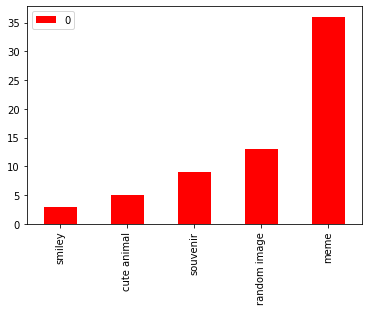

In [32]:
fridge_sorted_bar(color='red')

## Objective 2
### Explanation of Results

200-400 Words

### Visualisation

## Objective 3
### Explanation of Results

200-400 Words

### Visualisation

## Objective 4 
### Explanation of Results

200-400 Words

### Visualisation

# Conclusion (5 marks)

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections._

### Achievements
_As we had expected, the most popular fridge magnets were of the 'meme' kind.
We were surprised that 'smiley' fridge magnets were less common than expected.
We conjecture that this is because, although they are apparently very popular,
few fridges display more than one smiley. However, 'meme' based magnets can
be found in large numbers, even on quite small fridges._

### Limitations

_The project was limited to a small number of fridge magents, which may not be
typical of fridges found in the global fridge magnet ecosystem._

### Future Work

_In future work we would like to obtain more diverse data and study fridge magnets 
beyond the limited confines of student accomodation. We hypothesise that there
could be a link between fridge magnet types and social class and/or educational
achievement._